## Ghather

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
%matplotlib inline

In [13]:
#Getting image dataset from URL provided in project details
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
images = requests.get(url)
open('image-predictions.tsv', mode='wb').write(images.content)

335079

In [14]:
#archive & tweet datasets downloaded from resources on Udacity
archive = pd.read_csv('twitter-archive-enhanced.csv')
image = pd.read_csv('image-predictions.tsv', sep='\t')
tweet = pd.read_json('tweet-json.txt', lines=True)

## Assess

In [3]:
archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [5]:
sum(archive.duplicated())

0

In [6]:
archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [7]:
archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [8]:
archive.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Oliver         11
Lucy           11
Tucker         10
Lola           10
Penny          10
Bo              9
Winston         9
the             8
Sadie           8
Daisy           7
Toby            7
an              7
Buddy           7
Bailey          7
Rusty           6
Bella           6
Koda            6
Milo            6
Scout           6
Oscar           6
Dave            6
Leo             6
Jack            6
Jax             6
Stanley         6
Gus             5
             ... 
Chesterson      1
Kobe            1
Dante           1
Marvin          1
Sweets          1
Bobby           1
Henry           1
Brudge          1
Liam            1
Fido            1
Lillie          1
Jaycob          1
Mairi           1
Dug             1
Dido            1
Eleanor         1
Taco            1
Jareld          1
Richie          1
Kara            1
Pip             1
Maya            1
Hall            1
Ambrose         1
Zuzu      

In [11]:
image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [10]:
image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [11]:
image.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [12]:
sum(image.duplicated())

0

In [13]:
tweet.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,0.0,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,NaN,...,0.0,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,0.0,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,NaN,...,0.0,NaN,NaN,NaN,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,NaN,...,0.0,NaN,NaN,NaN,9774,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [14]:
tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2354 non-null datetime64[ns]
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null float64
id                               2354 non-null int64
id_str                           2354 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 n

In [15]:
tweet.describe()

,contributors,coordinates,favorite_count,geo,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str,retweet_count
count,0.0,0.0,2354.000000,0.0,2.354000e+03,2.354000e+03,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,2211.0,2211.0,2.900000e+01,2.900000e+01,2354.000000
mean,NaN,NaN,8080.968564,NaN,7.426978e+17,7.426978e+17,7.455079e+17,7.455079e+17,2.014171e+16,2.014171e+16,0.0,0.0,8.162686e+17,8.162686e+17,3164.797366
std,NaN,NaN,11814.771334,NaN,6.852812e+16,6.852812e+16,7.582492e+16,7.582492e+16,1.252797e+17,1.252797e+17,0.0,0.0,6.164161e+16,6.164161e+16,5284.770364
min,NaN,NaN,0.000000,NaN,6.660209e+17,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,0.0,0.0,6.721083e+17,6.721083e+17,0.000000
25%,NaN,NaN,1415.000000,NaN,6.783975e+17,6.783975e+17,6.757419e+17,6.757419e+17,3.086374e+08,3.086374e+08,0.0,0.0,7.888183e+17,7.888183e+17,624.500000
50%,NaN,NaN,3603.500000,NaN,7.194596e+17,7.194596e+17,7.038708e+17,7.038708e+17,4.196984e+09,4.196984e+09,0.0,0.0,8.340867e+17,8.340867e+17,1473.500000
75%,NaN,NaN,10122.250000,NaN,7.993058e+17,7.993058e+17,8.257804e+17,8.257804e+17,4.196984e+09,4.196984e+09,0.0,0.0,8.664587e+17,8.664587e+17,3652.000000
max,NaN,NaN,132810.000000,NaN,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,0.0,0.0,8.860534e+17,8.860534e+17,79515.000000


In [16]:
tweet.lang.value_counts()

en     2336
und       7
nl        3
in        3
eu        1
ro        1
et        1
es        1
tl        1
Name: lang, dtype: int64

# Quality

## Archive Table

1) Below columns have many null records

    i) in_reply_to_status_id
    ii) in_reply_to_user_id
    iii) retweeted_status_id
    iV) retweeted_status_id
    V) retweeted_status_user_id
    VI) retweeted_status_timestamp
    VII) expanded_urls

2) Timestamp is object should be date

3) Timestamp has +0000 in the end should be removed to be converted

4) The values in archive dominator and nominator should be from 0 to 10 but some values are way out of range should be capped at 15 for example

## Tweet Table

5) Many columns have null values

6) Nearly all of the values in the lang column is the same 'en' so it doesn't add that much value and will be dropped

7) id column in tweet table should be renamed to tweet_id to match the other tables as they are all refrence to the same thing. 

###### 8) Some Columns doesn't add any valueable information in the 3 tables so they should be dropped. 

# Tidniess

1) The 3 tables should be merged in one table

2) The last 4 columns in archive table should be merged in one column and assesed whether to be dropped or not if most of the values are None

# Clean

In [17]:
archive_clean = archive.copy()
image_clean = image.copy()
tweet_clean = tweet.copy()

### Missing Data

Many null values in different columns in archive table

### Define

Drop these columns as they don't have to much significant 

### Code

In [18]:
archive_clean = archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_id', 
                   'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls'], axis = 1)

### Test

In [19]:
archive_clean.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None


### Timestamp cleaning

### Define

removing +0000 from the timestamp column

### Code

In [20]:
archive_clean.timestamp = archive_clean.timestamp.str.strip('+0000')

### Test

In [21]:
archive_clean.timestamp.head()

0    2017-08-01 16:23:56 
1    2017-08-01 00:17:27 
2    2017-07-31 00:18:03 
3    2017-07-30 15:58:51 
4    2017-07-29 16:00:24 
Name: timestamp, dtype: object

### Define

Timestamp is an object not date

### Code

In [22]:
archive_clean.timestamp = pd.to_datetime(archive_clean.timestamp)

### Test

In [23]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null datetime64[ns]
source                2356 non-null object
text                  2356 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: datetime64[ns](1), int64(3), object(7)
memory usage: 202.5+ KB


### Values out of range

Rating values should be from 0 to 10 so will maximize to 15 giving +5 margin

### Define

Replacing any values more than 15 with 15

### Code

In [24]:
archive_clean.rating_numerator.head()

0    13
1    13
2    12
3    13
4    12
Name: rating_numerator, dtype: int64

In [25]:
for i in archive_clean.rating_numerator:
    if i > 15:
        archive_clean.rating_numerator.replace (i, 15, inplace=True)

In [26]:
for i in archive_clean.rating_denominator:
    if i > 15:
        archive_clean.rating_denominator.replace (i, 15, inplace=True)

### Test

In [27]:
archive_clean.rating_numerator.value_counts()

12    558
11    464
10    461
13    351
9     158
8     102
7      55
14     54
5      37
6      32
15     28
3      19
4      17
1       9
2       9
0       2
Name: rating_numerator, dtype: int64

In [28]:
archive_clean.rating_denominator.value_counts()

10    2333
15      17
11       3
7        1
2        1
0        1
Name: rating_denominator, dtype: int64

### Missing data

Many null values in different columns in tweet table

### Define

Drop the null columns as it doesn't add much value

### Code

In [29]:
tweet_clean = tweet_clean.drop(['contributors', 'coordinates', 'extended_entities', 'geo', 'in_reply_to_screen_name',
                 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 
                 'place', 'possibly_sensitive', 'possibly_sensitive_appealable', 'quoted_status', 'quoted_status_id', 
                'quoted_status_id_str', 'retweeted_status'], axis=1)

### Test

In [30]:
tweet_clean.head()

,created_at,display_text_range,entities,favorite_count,favorited,full_text,id,id_str,is_quote_status,lang,retweet_count,retweeted,source,truncated,user
0,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...",39467,False,This is Phineas. He's a mystical boy. Only eve...,892420643555336193,892420643555336192,False,en,8853,False,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...",33819,False,This is Tilly. She's just checking pup on you....,892177421306343426,892177421306343424,False,en,6514,False,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,891815181378084864,891815181378084864,False,en,4328,False,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...",42908,False,This is Darla. She commenced a snooze mid meal...,891689557279858688,891689557279858688,False,en,8964,False,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...",41048,False,This is Franklin. He would like you to stop ca...,891327558926688256,891327558926688256,False,en,9774,False,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [31]:
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 15 columns):
created_at            2354 non-null datetime64[ns]
display_text_range    2354 non-null object
entities              2354 non-null object
favorite_count        2354 non-null int64
favorited             2354 non-null bool
full_text             2354 non-null object
id                    2354 non-null int64
id_str                2354 non-null int64
is_quote_status       2354 non-null bool
lang                  2354 non-null object
retweet_count         2354 non-null int64
retweeted             2354 non-null bool
source                2354 non-null object
truncated             2354 non-null bool
user                  2354 non-null object
dtypes: bool(4), datetime64[ns](1), int64(4), object(6)
memory usage: 211.6+ KB


### Dropping Unwanted Columns

Some columns doesn't have valuable information that affects our insights

### Define

Dropping the unwanted columns in each table

### Code

In [32]:
archive_clean = archive_clean.drop(['source', 'text'], axis=1)

In [33]:
image_clean = image_clean.drop(['img_num'], axis=1)

In [34]:
tweet_clean = tweet_clean.drop(['created_at', 'display_text_range', 'entities', 'full_text', 'id_str', 'source', 'truncated', 'user', 
                 'favorited', 'is_quote_status','retweeted', 'lang' ], axis = 1)

### Merging Columns

4 columns can be indicated in two instead to be more tidy data

### Define

Combinig doggo, floofer, pupper & puppo columns

In [35]:
melt = pd.melt(archive_clean, id_vars=['tweet_id', 'timestamp', 'rating_numerator', 'name',
                                             'rating_denominator'], var_name='dog')

### Test

In [36]:
melt.head(10)
#melt.query('value == "None"')

,tweet_id,timestamp,rating_numerator,name,rating_denominator,dog,value
0,892420643555336193,2017-08-01 16:23:56,13,Phineas,10,doggo,None
1,892177421306343426,2017-08-01 00:17:27,13,Tilly,10,doggo,None
2,891815181378084864,2017-07-31 00:18:03,12,Archie,10,doggo,None
3,891689557279858688,2017-07-30 15:58:51,13,Darla,10,doggo,None
4,891327558926688256,2017-07-29 16:00:24,12,Franklin,10,doggo,None
5,891087950875897856,2017-07-29 00:08:17,13,None,10,doggo,None
6,890971913173991426,2017-07-28 16:27:12,13,Jax,10,doggo,None
7,890729181411237888,2017-07-28 00:22:40,13,None,10,doggo,None
8,890609185150312448,2017-07-27 16:25:51,13,Zoey,10,doggo,None
9,890240255349198849,2017-07-26 15:59:51,14,Cassie,10,doggo,doggo


## Re-Assess

In [37]:
melt.query('value == "None"').count()

tweet_id              9030
timestamp             9030
rating_numerator      9030
name                  9030
rating_denominator    9030
dog                   9030
value                 9030
dtype: int64

In [38]:
melt.query('value != "None"').count()

tweet_id              394
timestamp             394
rating_numerator      394
name                  394
rating_denominator    394
dog                   394
value                 394
dtype: int64

### Will drop these 4 columns from the dataset as it doesn't have that much effect

### Code

In [39]:
archive_clean = archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

### Test 

In [40]:
archive_clean.head()

,tweet_id,timestamp,rating_numerator,rating_denominator,name
0,892420643555336193,2017-08-01 16:23:56,13,10,Phineas
1,892177421306343426,2017-08-01 00:17:27,13,10,Tilly
2,891815181378084864,2017-07-31 00:18:03,12,10,Archie
3,891689557279858688,2017-07-30 15:58:51,13,10,Darla
4,891327558926688256,2017-07-29 16:00:24,12,10,Franklin


### Renaming Column

id column in tweet table should be tweet_id to match other tables

### Define

Renaming id column in tweet table

### Code

In [41]:
tweet_clean = tweet_clean.rename(columns={"id": "tweet_id"})

### Test

In [42]:
tweet_clean.head()

,favorite_count,tweet_id,retweet_count
0,39467,892420643555336193,8853
1,33819,892177421306343426,6514
2,25461,891815181378084864,4328
3,42908,891689557279858688,8964
4,41048,891327558926688256,9774


### Making One Dataset

The 3 datasets should be merged in 1 dataset only

### Define

Merging the 3 tables

### Code

In [43]:
df1 = archive_clean.merge(image_clean, on='tweet_id')

In [44]:
df = df1.merge(tweet_clean, on='tweet_id')

### Testing

In [45]:
df.head()

,tweet_id,timestamp,rating_numerator,rating_denominator,name,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56,13,10,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,39467,8853
1,892177421306343426,2017-08-01 00:17:27,13,10,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,33819,6514
2,891815181378084864,2017-07-31 00:18:03,12,10,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,25461,4328
3,891689557279858688,2017-07-30 15:58:51,13,10,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,42908,8964
4,891327558926688256,2017-07-29 16:00:24,12,10,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,41048,9774


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 17 columns):
tweet_id              2073 non-null int64
timestamp             2073 non-null datetime64[ns]
rating_numerator      2073 non-null int64
rating_denominator    2073 non-null int64
name                  2073 non-null object
jpg_url               2073 non-null object
p1                    2073 non-null object
p1_conf               2073 non-null float64
p1_dog                2073 non-null bool
p2                    2073 non-null object
p2_conf               2073 non-null float64
p2_dog                2073 non-null bool
p3                    2073 non-null object
p3_conf               2073 non-null float64
p3_dog                2073 non-null bool
favorite_count        2073 non-null int64
retweet_count         2073 non-null int64
dtypes: bool(3), datetime64[ns](1), float64(3), int64(5), object(5)
memory usage: 249.0+ KB


### Saving The final cleaned data frame to .csv file

In [47]:
df.to_csv('tweeter_final.csv')

### Getting some insights from the final cleaned data frame

In [48]:
df.name.value_counts()

None         577
a             55
Charlie       11
Penny         10
Lucy          10
Oliver        10
Cooper        10
Tucker        10
Lola           8
Winston        8
Sadie          8
Bo             8
an             7
Daisy          7
the            7
Toby           7
Bella          6
Koda           6
Milo           6
Scout          6
Dave           6
Jax            6
Bailey         6
Rusty          6
Stanley        6
Buddy          5
Louis          5
Chester        5
Larry          5
Leo            5
            ... 
Katie          1
Tupawc         1
Zara           1
Fletcher       1
Emma           1
Rey            1
Bloop          1
Cora           1
Dudley         1
Bertson        1
Joey           1
Gunner         1
Edgar          1
Anakin         1
Sonny          1
Devón          1
Jebberson      1
Lili           1
Harrison       1
Jeffri         1
Jeb            1
Cecil          1
Ralphie        1
JD             1
Ebby           1
Ridley         1
Bronte         1
Lulu          

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1aae191710>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f1aadb21e80>]], dtype=object)

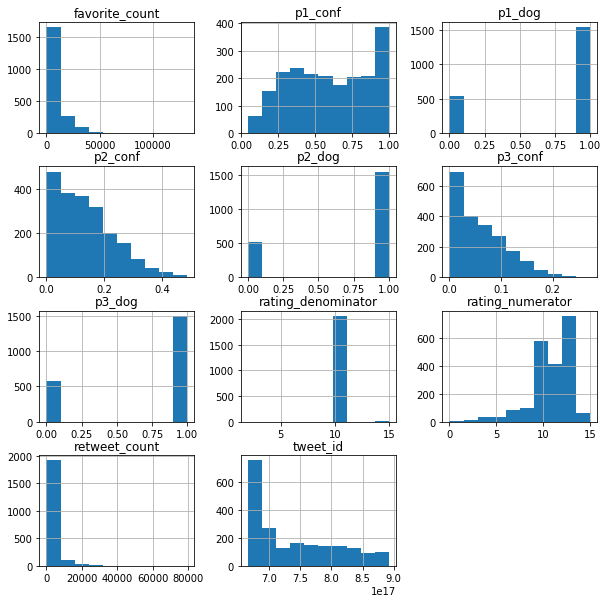

In [53]:
df.hist(figsize=(10,10))

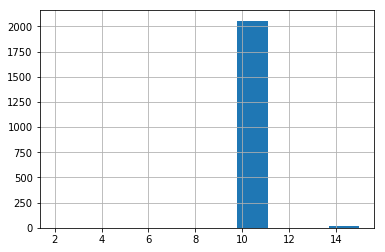

In [54]:
df.rating_denominator.hist()

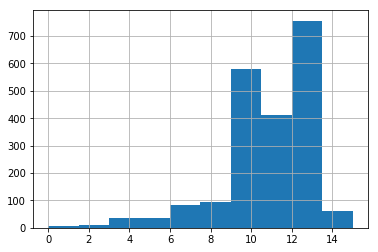

In [55]:
df.rating_numerator.hist()

# Insights

1) Almost all the dog ratings denominators values are between 10~11

2) The dog ratings denominators vary on different values but mostly from the range of 9~13 values

3) Some people give over rating values for their dogs which should be rounded as we did here.

4) Either somer people don't name their dogs or they see it's not necessary to mention.

5) Their is a positive relation between retweet count and favorite count most probably people who favorite a tweet also retweet it